## Build target dataframe

In [1]:
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
# Get underlying prices
spy = pd.read_csv("../data/raw/spy.csv", parse_dates=True, index_col=0)

In [3]:
# Get the working dataframe
ml_df = pd.read_csv("../data/processed/ml_df.csv", parse_dates=True, index_col=0)

In [4]:
ml_df

,QUOTE_DATE,EXPIRE_DATE,UNDERLYING_LAST,STRIKE,C_LAST,C_BID,C_ASK,C_IV,C_VOLUME,diff,diff_date
Date,,,,,,,,,,,
2018-01-02,2018-01-02,2018-01-24,268.81,269.0,1.56,1.72,1.76,0.07134,80.0,0.19,22
2018-01-03,2018-01-03,2018-01-24,270.47,270.0,2.15,2.10,2.15,0.07361,271.0,0.47,21
2018-01-04,2018-01-04,2018-01-24,271.56,272.0,1.67,1.57,1.61,0.06871,392.0,0.44,20
2018-01-05,2018-01-05,2018-01-26,273.41,273.0,2.21,2.23,2.28,0.07675,NaN,0.41,21
2018-01-08,2018-01-08,2018-01-31,273.94,274.0,2.08,2.07,2.09,0.07593,490.0,0.06,23
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,2023-12-21,2024-01-12,472.70,473.0,6.07,6.23,6.25,0.11781,493.0,0.30,22
2023-12-22,2023-12-22,2024-01-12,473.68,474.0,5.70,5.75,5.78,0.11611,1917.0,0.32,21
2023-12-27,2023-12-27,2024-01-19,476.47,476.0,6.19,6.15,6.23,0.10420,2636.0,0.47,23


In [5]:
# Create target_df
target = []
target_mc = []
last_price = []
call_prices = []
final_prices = []
strikes = []
exp_dates = []
exp_profit = []
date_idx = []
prev_price = 0.0
for row in tqdm(ml_df.itertuples(), total=len(ml_df)):
    # Get present quotation
    start_price = row.UNDERLYING_LAST
    # Get call price
    call_price = row.C_LAST
    # Get expire date
    exp_date = pd.to_datetime(row.EXPIRE_DATE)
    # Quote date
    quote_date = pd.to_datetime(row.QUOTE_DATE)
    # Strike price
    strike = row.STRIKE
    # Get price at expiration
    # Needed since a day in YF is missing
    try:
        final_price = spy.loc[exp_date, "Close"]
    except KeyError:
        final_price = prev_price
    prev_price = final_price

    profit = final_price - (strike + call_price)
    # Buy or sell
    # If the final price is bigger than the actual one + the call price
    # Buy, otherwise sell.
    threshold = 3
    if profit > threshold:
        result = 1
    elif profit < -threshold:
        result = -1
    else:
        result = 0

    target.append(int(profit > 0))
    target_mc.append(result)
    last_price.append(start_price)
    call_prices.append(call_price)
    final_prices.append(final_price)
    strikes.append(strike)
    exp_profit.append(profit)
    exp_dates.append(exp_date)
    date_idx.append(quote_date)

  0%|          | 0/1452 [00:00<?, ?it/s]

In [6]:
assert len(target) == len(ml_df)

In [7]:
target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


In [8]:
target_df = pd.DataFrame(
    {
        "last_price": last_price,
        "final_price": final_prices,
        "call_price": call_prices,
        "exp_profit": exp_profit,
        "strike": strikes,
        "target": target,
        "target_mc": target_mc,
        "exp_date": exp_dates,
    },
    index=pd.Index(name="Date", data=date_idx),
)

In [9]:
target_df

,last_price,final_price,call_price,exp_profit,strike,target,target_mc,exp_date
Date,,,,,,,,
2018-01-02,268.81,283.179993,1.56,12.619993,269.0,1,1,2018-01-24
2018-01-03,270.47,283.179993,2.15,11.029993,270.0,1,1,2018-01-24
2018-01-04,271.56,283.179993,1.67,9.509993,272.0,1,1,2018-01-24
2018-01-05,273.41,286.579987,2.21,11.369987,273.0,1,1,2018-01-26
2018-01-08,273.94,281.899994,2.08,5.819994,274.0,1,1,2018-01-31
...,...,...,...,...,...,...,...,...
2023-12-21,472.70,476.679993,6.07,-2.390007,473.0,0,0,2024-01-12
2023-12-22,473.68,476.679993,5.70,-3.020007,474.0,0,-1,2024-01-12
2023-12-27,476.47,482.429993,6.19,0.239993,476.0,1,0,2024-01-19


In [10]:
target_df.to_csv("../data/processed/target_df.csv")

In [11]:
pd.Series(target).value_counts()

0    746
1    706
Name: count, dtype: int64

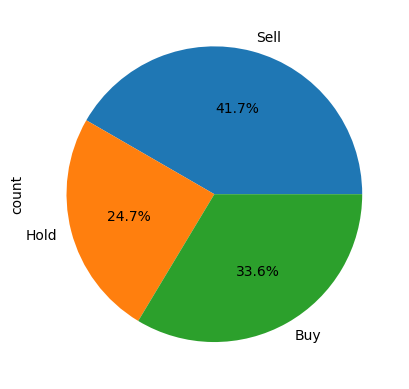

In [12]:
pd.Series(target_mc).value_counts().sort_index().plot(
    kind="pie", labels=["Sell", "Hold", "Buy"], autopct="%1.1f%%"
)

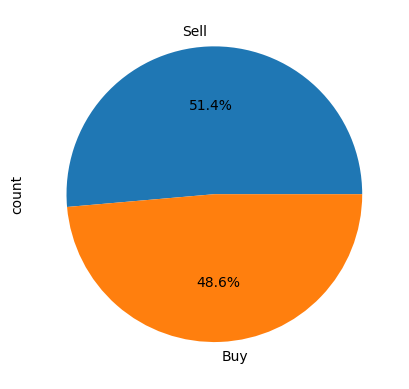

In [13]:
pd.Series(target).value_counts().sort_index().plot(
    kind="pie", labels=["Sell", "Buy"], autopct="%1.1f%%"
)